In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from matplotlib.lines import Line2D
import numpy as np

results = pd.read_csv("../wikicast/results.csv")
# persistence_results = [model_name for model_name in results["name"] if model_name == "persistence"]

num_windows = results["window"][len(results)-1] + 1
num_models = len(results) // num_windows

model_names = results["name"][:num_models]
mape_vals = results["mape"]
rmse_vals = results["rmse"]

models_mape = {}
models_rmse = {}
for i in range(num_models):
    models_mape[model_names[i]] = mape_vals[i::20]
    models_rmse[model_names[i]] = rmse_vals[i::20]

# set colors for different models
rainbow = cm.get_cmap('gist_rainbow', num_models)
colors = rainbow(range(num_models))

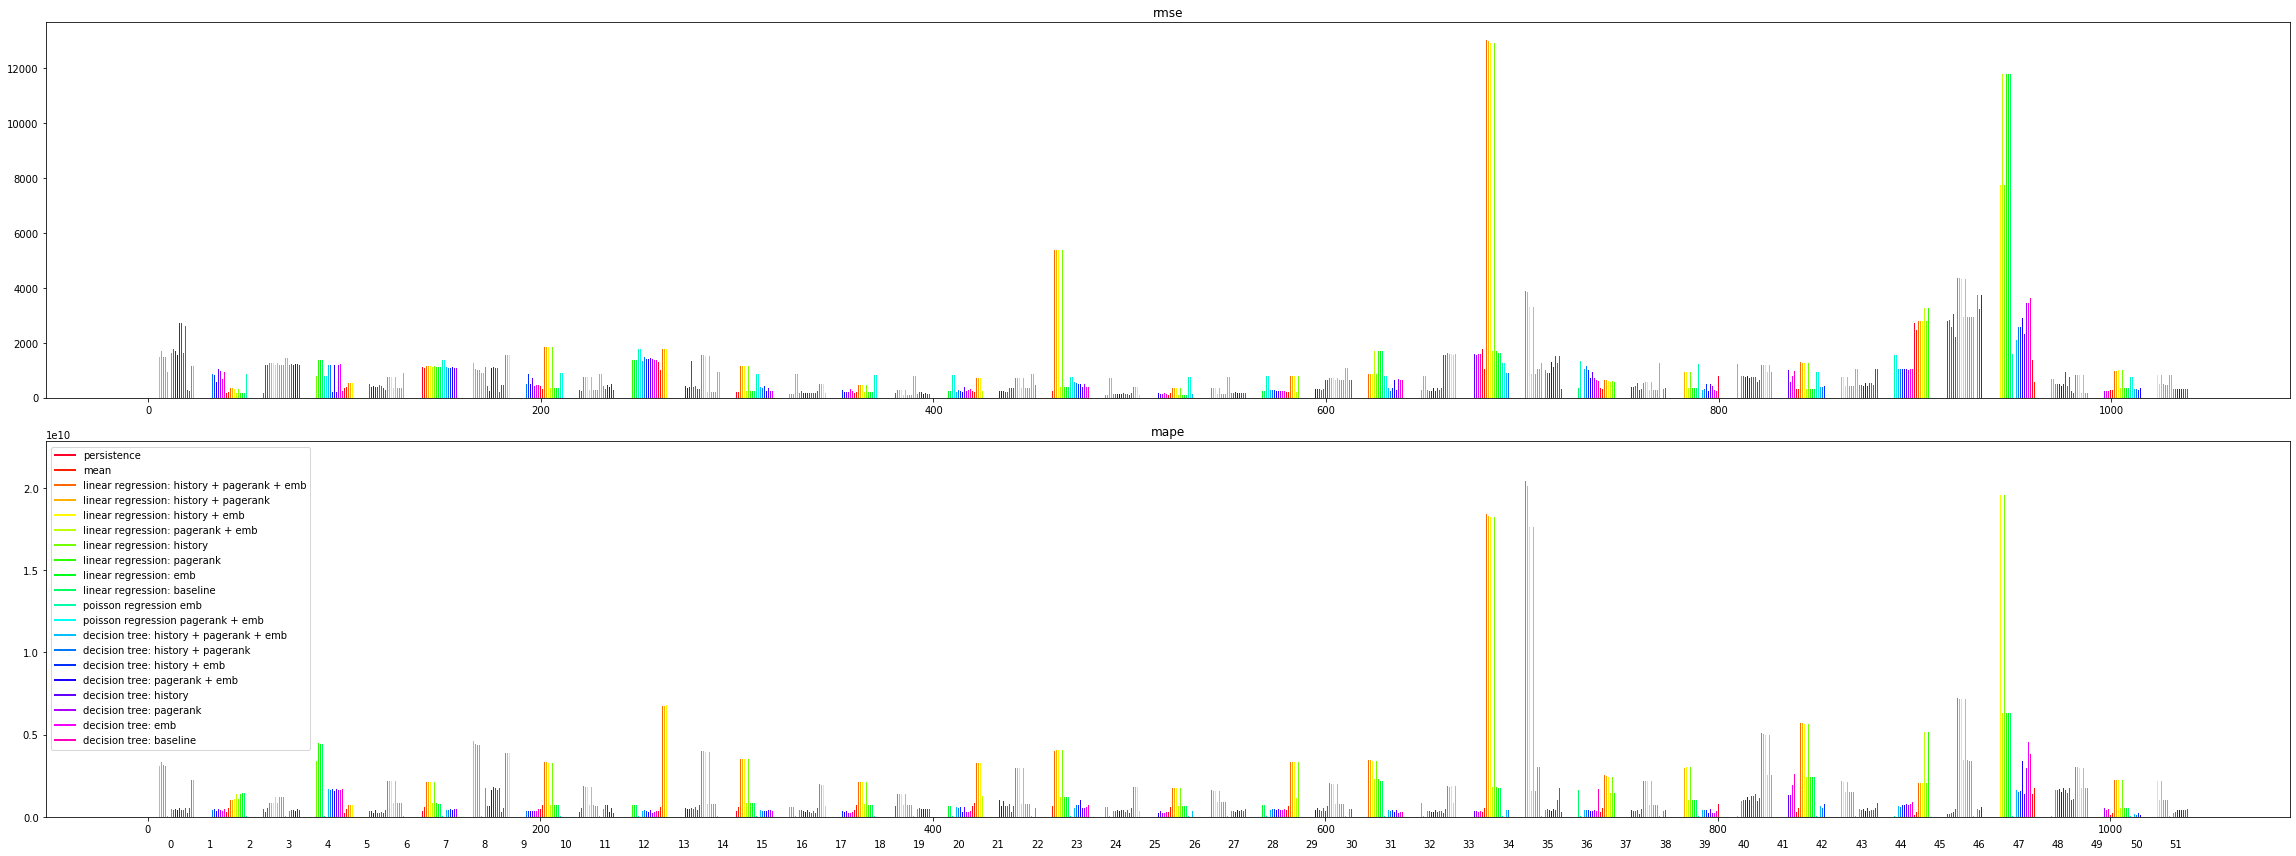

In [14]:
width = 0.35

labels = model_names
x = np.arange(len(results))

fig, (rmse_plot, mape_plot) = plt.subplots(nrows=2, ncols=1)
rmse_bars = rmse_plot.bar(x - width/2, rmse_vals, width, label="rmse", color=colors)
mape_bars = mape_plot.bar(x + width/2, mape_vals, width, label="mape", color=colors)
        
def windowlabel():
    for w in range(num_windows):
        plt.annotate('{}'.format(w),
                    xy=((w * num_models) + (num_models / 2), 0),
                    textcoords="offset points",
                    xytext=(0,-30)
                   )
# window annotations at the bottom of the plot
windowlabel()
        
rmse_plot.set_title("rmse")
mape_plot.set_title("mape")

# configure legend
custom_lines = [Line2D([0], [0], color=colors[i], lw=2) for i in range(num_models)]
plt.legend(custom_lines, model_names[:num_models], loc="upper left")

fig.set_size_inches(32, 12)

plt.tight_layout()
plt.show()

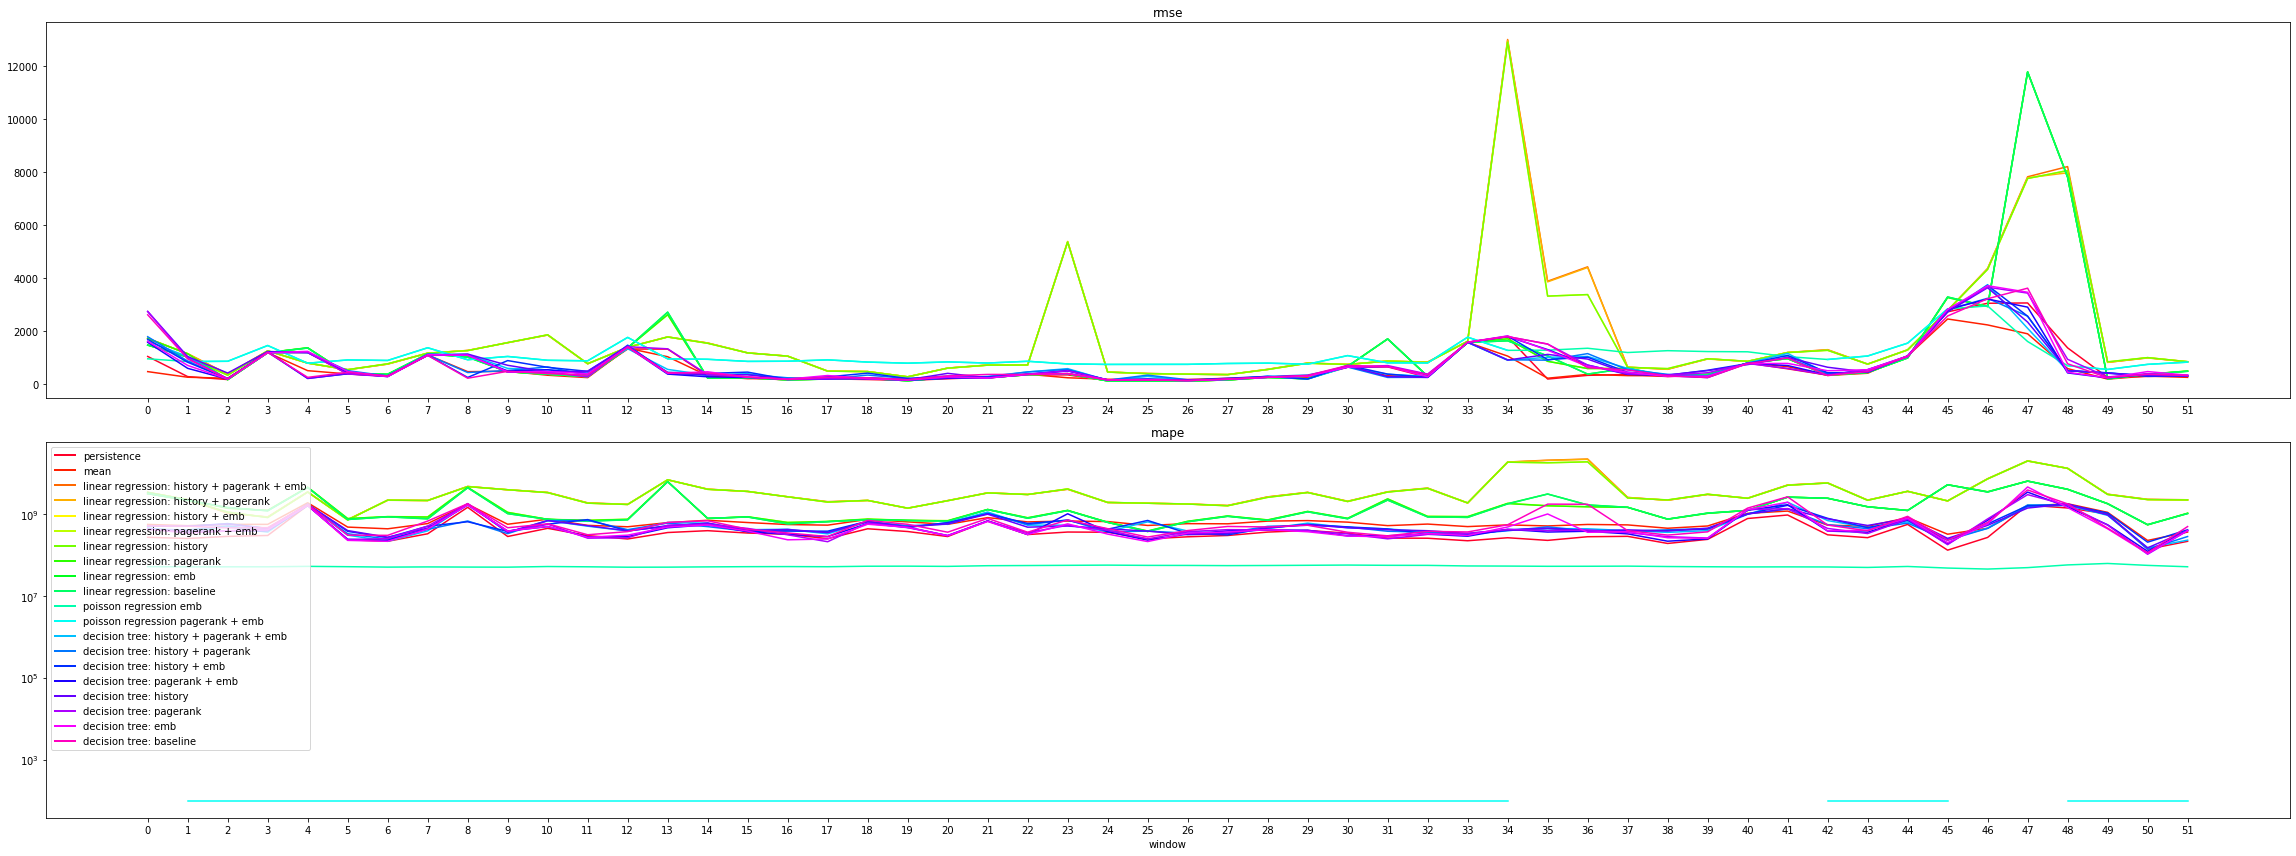

In [12]:
# create a line graph
x = np.arange(num_windows)
fig, (rmse_plot, mape_plot) = plt.subplots(nrows=2, ncols=1)

for i, model in enumerate(model_names):
    rmse_plot.plot(x, models_rmse[model], color=colors[i])
    mape_plot.plot(x, models_mape[model], color=colors[i])

fig.set_size_inches(32, 12)

rmse_plot.set_title("rmse")
mape_plot.set_title("mape")

# configure legend
custom_lines = [Line2D([0], [0], color=colors[i], lw=2) for i in range(num_models)]
plt.legend(custom_lines, model_names[:num_models], loc="upper left")

rmse_plot.set_xticks(x)
mape_plot.set_xticks(x)
plt.yscale("log")
plt.xlabel("window")
plt.tight_layout()
plt.show()